## Hypothesis Testing: Market Capitalization and PE/ EPS 

In [1]:
# import packages 
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import sys

from scipy import stats 

%matplotlib inline

In [2]:
bank_stats = pd.read_csv('../data/01_raw/all_stocks_stats.csv', index_col='ticker')

In [3]:
# drop na value for marketcap
bank_stats.dropna(subset=['marketcap'], inplace=True)
# we have 50 banks to work with 
len(bank_stats['marketcap'])

50

In [4]:
# sort value according to the market cap 
bank_stats.sort_values(by=['marketcap'], inplace=True)
# reset index
bank_stats.reset_index(inplace=True)

In [5]:
# split the dataset of 50 banks into large and small captilized banks
small_cap = bank_stats.iloc[0:25, :]
big_cap = bank_stats.iloc[25:, :]

### <font color='blue'>Bank Market Capitalization and P/E Ratio</font>

##### What is a P/E Ratio 
Source: https://www.investopedia.com/investing/use-pe-ratio-and-peg-to-tell-stocks-future/

The price-to-earnings ratio (P/E) is one of the most widely used metrics for investors and analysts to determine stock valuation. In addition to showing whether a company's stock price is overvalued or undervalued, the P/E can reveal how a stock's valuation compares to its industry group or a benchmark like the S&P 500 index.


The P/E ratio helps investors determine the market value of a stock as compared to the company's earnings. In short, the P/E shows what the market is willing to pay today for a stock based on its past or future earnings. A high P/E could mean that a stock's price is high relative to earnings and possibly overvalued. Conversely, a low P/E might indicate that the current stock price is low relative to earnings. 


However, companies that grow faster than average typically have higher P/Es, such as technology companies. A higher P/E ratio shows that investors are willing to pay a higher share price today because of growth expectations in the future. The average P/E for the S&P 500 has historically ranged from 13 to 15. For example, a company with a current P/E of 25, above the S&P average, trades at 25 times earnings. The high multiple indicates that investors expect higher growth from the company compared to the overall market. A high P/E does not necessarily mean a stock is overvalued. Any P/E ratio needs to be considered against the backdrop of the P/E for the company's industry.


Investors not only use the P/E ratio to determine a stock's market value but also in determining future earnings growth. For example, if earnings are expected to rise, investors might expect the company to increase its dividends as a result. Higher earnings and rising dividends typically lead to a higher stock price.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


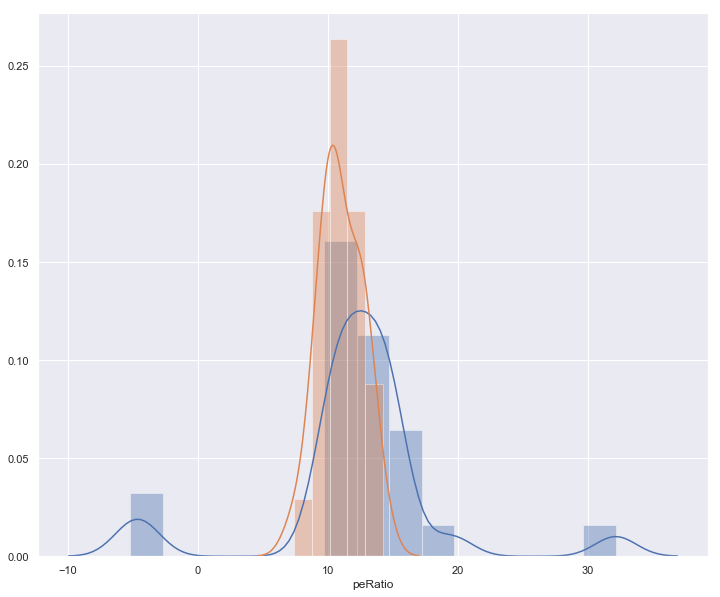

In [6]:
# PE distributions for small and big market cap banks
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(small_cap.peRatio) # Blue distribution
sns.distplot(big_cap.peRatio) # Green distribution
plt.show()

We see a slight difference in the mean and standard deviation of the p/e ratio for the big and small market cap banks. This gives us cause to take a look and see if it's significantly different. 

### 0. Calculate Stats for each group

Big market capitalization banks 

In [7]:
# Sample size (n)
n_b = len(big_cap)

# Degrees of Freedom
df_b = n_b-1

# Sample mean (x̄) using NumPy mean()
x_bar_b = big_cap.peRatio.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma_b = np.std(big_cap.peRatio ,ddof=df_b)

Small market capitalization banks

In [8]:
# Sample size (n)
n_s = len(small_cap)

# Degrees of Freedom
df_s = n_s-1

# Sample mean (x̄) using NumPy mean()
x_bar_s = small_cap.peRatio.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma_s = np.std(small_cap.peRatio ,ddof=df_s)

### I. Set up null and alternative hypotheses

$H_{0}$: The mean difference between small market cap and big market cap is zero. 
> $$H_{0}: \bar{X}_{high-marketcap} = \bar{X}_{low-marketcap}$$

$H_{a}$: The mean difference for our p/e ratio for small maket cap and big market cap banks is different than zero. 
> $$H_{a}: \bar{X}_{high-marketcap} \neq \bar{X}_{low-marketcap}$$

### II. Choose a significance level

We are performing a 2-tailed t-test. 

Significance level: $\alpha$ = 5%

### Calculate Pooled Sample Variance

Where $s^{2}{1}$ and $s^{2}{2}$ are the variances for each sample given by the formula: 

$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$\large s^{2}{p} = \frac{(n{1} -1)s^{2}{1} + (n{2} -1)s^{2}{2}}{n{1} + n_{2} - 2} $

In [39]:
# big cap variance 
mean_b = big_cap.peRatio.mean()
var_b = sum((big_cap.peRatio - mean_b)**2)/(len(big_cap.peRatio) - 1)
var_b

2.7227333333333337

In [32]:
singleVariance(big_cap.peRatio)

2.7227333333333337

In [27]:
# build variance function 
# variance for a single sampe distribution 
def singleVariance(sample):
    mean = sample.mean()
    var = sum((sample - mean)**2)/(len(sample) - 1)
    return var_b

In [33]:
singleVariance(small_cap.peRatio)

2.7227333333333337

In [10]:
# small cap variance 
mean_s = small_cap.peRatio.mean()
var_s = sum((small_cap.peRatio - mean_b)**2)/(len(small_cap.peRatio) - 1)
var_s

46.87944416666667

In [40]:
# build pooled variance function 
# pooled variance for two distributions
def pooledVariance(samp1, samp2):
    n_1 = len(samp1)
    n_2 = len(samp2)
    var_1 = sample_variance(samp1)
    var_2 = sample_variance(samp2)
    pooled_var = ((n_1 - 1)*var_1 + (n_2 - 1)*var_2)/ (n_1+n_2-2)
    return pooled_var

In [35]:
pooledVariance(big_cap.peRatio, small_cap.peRatio)

23.97997866666667

In [31]:
# pooled variance 
((len(big_cap.peRatio) - 1)*var_b + (len(small_cap.peRatio) - 1)*var_s) / (len(big_cap.peRatio) + len(small_cap) -2)

24.801088750000005

In [37]:
# build ttest function 
def ttest_two(samp1, samp2): 
    mean_1 = samp1.mean()
    mean_2 = samp2.mean()
    n_1 = len(samp1)
    n_2 = len(samp2)
    pool_var = pooledVariance(samp1, samp2)
    return (mean_1 - mean_2)/ np.sqrt(pool_var*((1/n_1)+(1/n_2)))
    

In [38]:
ttest_two(big_cap.peRatio, small_cap.peRatio)

-0.9065294498918849

### III. Calculate the test statistic

$\large t = \frac{\bar{x}{1} - \bar{x}{2}}{\sqrt{s^{2}{p} (\frac{1}{n{1}} + \frac{1}{n_{2}}) } } $


### IV. Determine the critical or p-value (find the rejection region)

In [16]:
ttest, pval = stats.ttest_ind(big_cap['peRatio'], small_cap['peRatio'])
print(ttest)
print(pval)

-0.9065294498918861
0.36918412602749395


### V. Compare p-value with critical t-value to accept or reject the Null hypothesis.

Fail to reject the null. We cannot say that the mean value of P/E ratio for banks with large market capitalization and banks with relatively small market capitalization are statistically different.  

### <font color='blue'>Bank Market Capitalization and EPS</font>

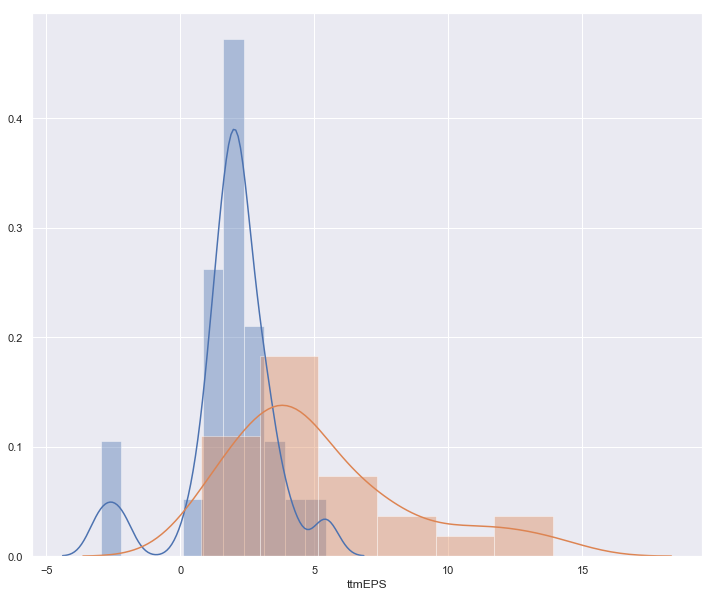

In [18]:
# PE distributions for small and big market cap banks
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(small_cap.ttmEPS) # Blue distribution
sns.distplot(big_cap.ttmEPS) # orange distribution
plt.show()

### 1.  Set-up Null and Alternative Hypothesis

$H_{0}$: The mean difference for EPS between small market cap and big market cap is zero. 
> $$H_{0}: \bar{X}_{high-marketcap} = \bar{X}_{low-marketcap}$$

$H_{a}$: The mean difference for EPS for small maket cap and big market cap banks is different than zero. 
> $$H_{a}: \bar{X}_{high-marketcap} \neq \bar{X}_{low-marketcap}$$

### II. Choose a significance Level 

We are performing a 2-tailed t-test. 

Significance level: $\alpha$ = 5%

### III . Calculate the T-Statistic and P-Value

In [20]:
ttest, pval = stats.ttest_ind(big_cap['ttmEPS'], small_cap['ttmEPS'])
print(ttest)
print(pval)

4.379282409694953
6.426781939047062e-05


We see that on average, banks with large market capitilization have higher earnings per share